## ML LAB ASSIGNMENT 

### SUPRATIM NAG -- CSE-AIML/22/057 -- GROUP-B

### Q-3:Implementation of Logistic Regression
###    (b)Use diabetes.csv for the prediction using Logistic Regression. Split the dataset into training and test dataset in 80:20 ratio. Train the model on training dataset and use the test dataset for the prediction purpose.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
data = pd.read_csv(r"C:\Users\SUPRATIM NAG\OneDrive\Documents\ML\Personal_Datasets\Dataset.csv")
data.head(1)

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis,Treatment Plan,Recovery Status,Medication Type,Follow-up Requirement
0,101,65,130,250,72,28.0,Hypertension with high cholesterol.,"Medication: Lisinopril (blood pressure), Stati...",Active Recovery,"Lisinopril, Statins.",Quarterly.


In [3]:
numerical_data = data[['Age', 'Blood Pressure', 'Cholesterol Levels', 'Heart Rate', 'BMI', 'Diagnosis']]

In [4]:
numerical_data['Diagnosis'] = numerical_data['Diagnosis'].apply(
    lambda x: 1 if 'Hypertension' in x  else 0
)

C:\Users\SUPRATIM NAG\AppData\Local\Temp\ipykernel_16780\3593694202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['Diagnosis'] = numerical_data['Diagnosis'].apply(


In [5]:
print(numerical_data['Diagnosis'].value_counts())

Diagnosis
0    69
1    31
Name: count, dtype: int64


In [6]:
X = numerical_data.drop('Diagnosis', axis=1)
y = numerical_data['Diagnosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
print(X_test)

    Age  Blood Pressure  Cholesterol Levels  Heart Rate   BMI
26   45             120                 170          70  26.0
86   32             105                 150          70  18.0
2    58             140                 200          80  30.0
55   34             110                 160          75  22.0
75   55             135                 230          85  29.0
93   30             110                 170          80  21.0
16   65             140                 200          75  35.0
73   40             115                 170          75  22.0
54   58             120                 210          80  25.0
95   45             140                 260          85  32.0
53   70             160                 250          90  33.0
92   55             115                 200          75  25.0
78   30             120                 180          80  19.0
13   45             115                 220          70  28.0
7    45             120                 200          70  25.0
30   30 

In [9]:
logreg = LogisticRegression(max_iter=1000)

In [10]:
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11,  1],
       [ 4,  4]], dtype=int64)

([<matplotlib.axis.YTick at 0x1db0bfffd50>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

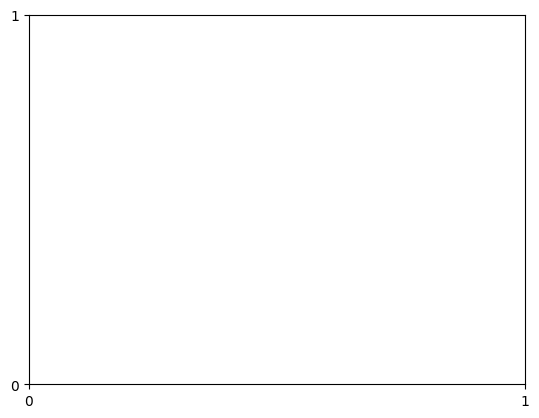

In [11]:
#Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

<Axes: >

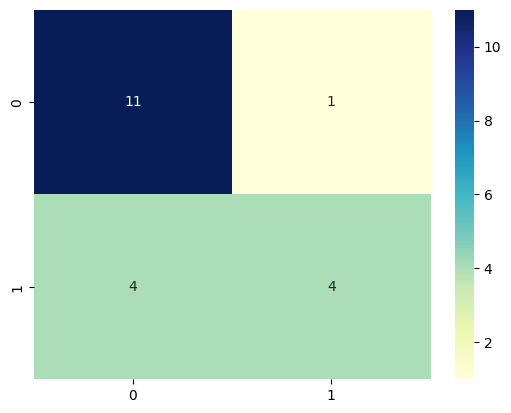

In [12]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

In [13]:
ax.xaxis.set_label_position("top")
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

Accuracy: 0.75
Precision: 0.8
Recall: 0.5


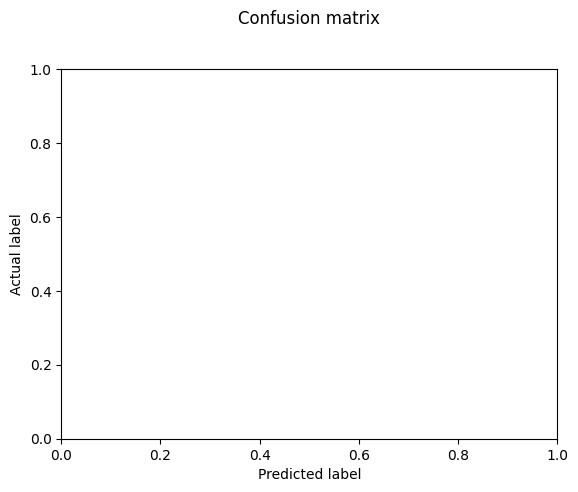

In [14]:
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

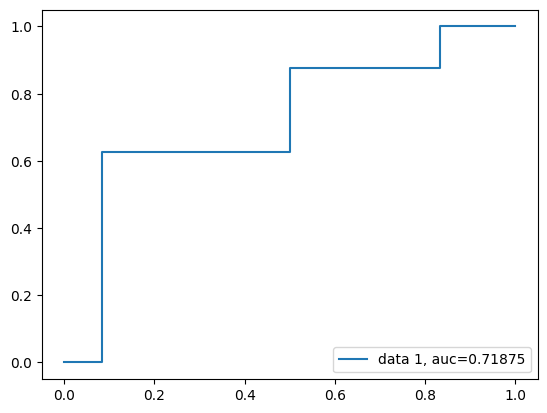

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()